# VQE for ZZ

This is a simple Variational Quantum Eigensolver just for practice purposes. It has a very simple Hamiltonian i.e. $Z\otimes Z$.

In [2]:
from qiskit import *
import numpy as np
from math import pi, sqrt

# Decomposition

Although Decomposition is not needed for this Hamiltonial, but for verification decomposition is done.  
The Matrix $Z\otimes Z$ would be:  
$[1, 0,0,0]$  
$[0,-1,0,0]$  
$[0,0,-1,0]$  
$[0, 0,0,1]$  

In [3]:
def HS(M1, M2):
    """Hilbert-Schmidt-Product of two matrices M1, M2"""
    return (np.dot(M1.conjugate().transpose(), M2)).trace()



def decompose(H):
    """Decompose Hermitian 4x4 matrix H into Pauli matrices"""
    from numpy import kron
    sx = np.array([[0, 1],  [ 1, 0]], dtype=np.complex128)
    sy = np.array([[0, -1j],[1j, 0]], dtype=np.complex128)
    sz = np.array([[1, 0],  [0, -1]], dtype=np.complex128)
    id = np.array([[1, 0],  [ 0, 1]], dtype=np.complex128)
    S = [id, sx, sy, sz]
    labels = ['I', 'sigma_x', 'sigma_y', 'sigma_z']
    for i in range(4):
        for j in range(4):
            label = labels[i] + labels[j]
            a_ij = 0.25 * HS(kron(S[i], S[j]), H)
            if a_ij != 0.0:
                print(a_ij,'*' ,label, '+')

In [4]:
M = np.array([[1,0,0,0], [0,-1,0,0], [0,0,-1,0],[0,0,0,1]])

In [5]:
decompose(M)

(1+0j) * sigma_zsigma_z +


# The Hamiltonian


$(1+0j) * ZZ$  

Because it is completely in the Z basis so basis change is not requried and it only has one circuit so one circuit is required.

# The ansatz

The ansatz chosen here is $Rx Rz$.

In [6]:
def ansatz(angle):
    ckt = QuantumCircuit(2)
    ckt.rx(angle, 0)  # Rx on first bit
    ckt.rz(angle, 1)  # Rz on second bit
    
    return ckt

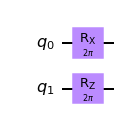

In [7]:
# The ansatz circuit
ckt = ansatz(2*np.pi)
ckt.draw(output='mpl')

# The ZZ Circuit Measurement

Because all of the measurements are done in the Z basis, so no basis change is required i.e. we can directly measure the results.

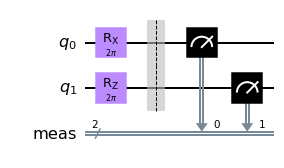

In [8]:
def zz_part(ckt):
    zz_ckt = ckt.copy()
    zz_ckt.measure_all()
    return zz_ckt

zz_ckt = zz_part(ckt)
zz_ckt.draw(output='mpl')

In [9]:
# The simulator

sim = Aer.get_backend("qasm_simulator")

# The ZZ Calculations

The simulation needs to be done multiple times and after taking the average we can get the eigenvalue for the given circuit.  

For hamiltonian calculation we simply need to add the value for all the parts of the hamiltonian. But our hamiltonian has only one part so it is going to be the energy itself.

In [10]:
def ZZ(ckt, shots=1000):
    zz_ckt = zz_part(ckt)
    # run the simulation
    res = execute(zz_ckt, backend = sim, shots=shots).result()
    items = res.get_counts(zz_ckt).items()
    
    sm=0
    for key, count in items:
        sm = sm + ((-1)**(int(key[0]) + int(key[1])) * count)
    ans = sm/shots
#     print(ans)
    return ans


In [11]:
def Ham(ckt, shots=1000):
    zz_ans = ZZ(ckt, shots)
    e = 1*zz_ans
    return e

# Calculation for minimum energy eigenvalue

Ansatz should be chosen such that it can cover a wide range of trial states, so we can get closer to the actual ground state energy.

In [13]:
min_energy = 100
energies = []
for i in range(0, 361):
    ckt = ansatz(i*np.pi/180)
    energy = Ham(ckt, 1000)
#     print(f"current energy for angle theta = {i} is {energy}")
    energies.append(energy)
    if(energy < min_energy):
        min_energy = energy
# angles = np.linspace(0.0, 2.0 * np.pi, 361)

print(f"Minimum energy eigenvalue is: {min_energy}")

Minimum energy eigenvalue is: -1.0


In [14]:
w = np.linalg.eigvals(M)
print(f'Lowest eigenvalue found classicaly is {min(w)}')

Lowest eigenvalue found classicaly is -1.0


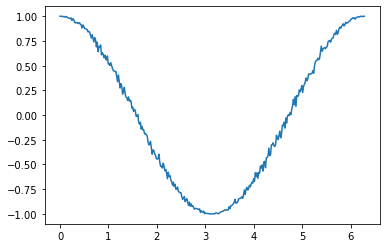

In [17]:
import matplotlib.pyplot as plt
angles = np.linspace(0.0, 2.0 * np.pi, 361)
plt.plot(angles, energies)
plt.show()